In [ ]:
# This version was taken from Video_editor_take_3
# It works but the order is slightly incorrect so care needs to be taken

In [1]:
import tensorflow as tf

training_data_path = "./train"
test_data_path = "./test"
SEED = 42
image_size = (256,256)
color_mode='rgb'
number_colour_layers = 3
image_shape = image_size + (number_colour_layers,)

def get_image_data(data_path, color_mode, image_size, seed = None, subset = None, validation_split = None):
    if subset:
        validation_split = 0.2
    raw_data_set = \
    tf.keras.preprocessing.image_dataset_from_directory(
        data_path,
        color_mode=color_mode,
        image_size=image_size,
        seed=seed,
        validation_split=validation_split, 
        subset=subset
    )
    
    raw_data_set.class_names.sort()
    
    return {
        "data": raw_data_set.cache().prefetch(
        buffer_size = tf.data.experimental.AUTOTUNE
        ),
        "classNames": raw_data_set.class_names
    }


In [2]:

training_ds = get_image_data(
    training_data_path,
    color_mode,
    image_size,
    SEED,
    subset = "training"
)
validation_ds = get_image_data(
    training_data_path,
    color_mode,
    image_size,
    SEED,
    subset = "validation"
)
test_ds = get_image_data(
    test_data_path,
    color_mode,
    image_size
)


Found 16000 files belonging to 2 classes.
Using 12800 files for training.
Found 16000 files belonging to 2 classes.
Using 3200 files for validation.
Found 5476 files belonging to 2 classes.


In [6]:
training_data_path = "./train"
test_data_path = "./test"
SEED = 42
image_size = (256,256)
color_mode='rgb'
number_colour_layers = 3
image_shape = image_size + (number_colour_layers,)

In [8]:
equivalence_check = training_ds["classNames"] == validation_ds["classNames"]
assert_fail_message = "Training and Validation classes should match"
assert(equivalence_check), assert_fail_message
class_names = training_ds["classNames"]
number_classes = len(class_names)


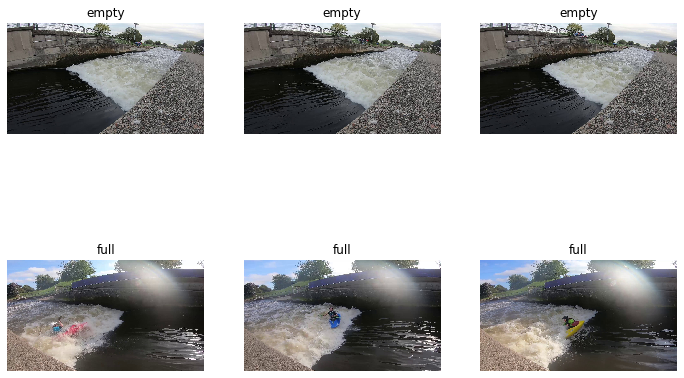

In [9]:
from os import listdir
from os.path import join
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
image_indexes = [286, 723, 1103]
selected_image_file_paths = dict()
for classification in class_names:
    image_directory = join(training_data_path, classification)
    image_file_names = listdir(image_directory)
    selected_image_file_paths[classification] = [join(image_directory, image_file_names[i]) for i in image_indexes]
plt.figure(figsize=(12, 8))
    
for i,classification in enumerate(class_names):
    for j,image in enumerate(selected_image_file_paths[classification]):
        image_number = (i * len(image_indexes)) + j + 1
        ax = plt.subplot(number_classes,3,image_number)
        plt.title(classification)
        plt.axis("off")
        plt.imshow(mpimg.imread(image))

In [10]:
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=image_shape)
]

In [11]:
def conv_2d_pooling_layers(filters, number_colour_layers):
    return [
        tf.keras.layers.Conv2D(
            filters,
            number_colour_layers,
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]
core_layers = \
    conv_2d_pooling_layers(16, number_colour_layers) + \
    conv_2d_pooling_layers(32, number_colour_layers) + \
    conv_2d_pooling_layers(64, number_colour_layers)

In [12]:
dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(number_classes)
]

In [13]:
model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

In [14]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer='adam',
    loss=loss,
    metrics=['accuracy']
)

In [15]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)
history = model.fit(
    training_ds["data"],
    validation_data = validation_ds["data"],
    epochs = 20,
    callbacks = [callback]
)

Epoch 1/20
180/180 [==============================] - 531s 3s/step - loss: 0.2820 - accuracy: 0.8705 - val_loss: 5.3894e-05 - val_accuracy: 1.0000
Epoch 2/20
180/180 [==============================] - 508s 3s/step - loss: 5.8569e-05 - accuracy: 1.0000 - val_loss: 2.2098e-05 - val_accuracy: 1.0000
Epoch 3/20
180/180 [==============================] - 464s 3s/step - loss: 2.6816e-05 - accuracy: 1.0000 - val_loss: 1.3242e-05 - val_accuracy: 1.0000
Epoch 4/20
180/180 [==============================] - 426s 2s/step - loss: 1.6354e-05 - accuracy: 1.0000 - val_loss: 8.9483e-06 - val_accuracy: 1.0000
Epoch 5/20
180/180 [==============================] - 340s 2s/step - loss: 1.1053e-05 - accuracy: 1.0000 - val_loss: 6.4583e-06 - val_accuracy: 1.0000
Epoch 6/20
180/180 [==============================] - 339s 2s/step - loss: 7.9454e-06 - accuracy: 1.0000 - val_loss: 4.8613e-06 - val_accuracy: 1.0000
Epoch 7/20
180/180 [==============================] - 289s 2s/step - loss: 5.9500e-06 - accuracy: 

In [16]:
model.save()


TypeError: save() missing 1 required positional argument: 'filepath'

In [17]:
model.save('My_Model')


INFO:tensorflow:Assets written to: My_Model\assets


In [18]:
model.save('my_model.h5')